### Working with Google Colaboratory and Google Drive

Before running the code below, I have downloaded the YOLO v3 and v4 repository from https://github.com/AlexeyAB/darknet and uploaded it to my Google Drive. Then I customized it for the needs of object I was trying to detect (lung nodules) and uploaded the images and label files generated by preprocessing.ipynb 

In [4]:
# mounting my google drive into the colaboratory cloud VM so that you can access its content
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'2D images extraction.ipynb'  'Deep Learning'	     Random	        yolov3
 Audio			       EEG		     Thesis_text.docx   yolov4
'Colab Notebooks'	       genesis		     weights
 darknet-master		       Genesismodels.ipynb   yolo


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# building the framework darknet (compile on linux)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

**In order to create a custom YOLO v3 and v4 detector we need the following:**

1.   Labeled Custom Dataset - **images and labels**
2.   Custom **configuration file**
3.   Pre-trained **weights** (darknet53.conv.74 and yolov4.conv.137 downloaded from https://pjreddie.com/ and https://github.com/AlexeyAB/darknet respectively)
4.   **obj.data** and **obj.names** files
5.   **train.txt** and **test.txt**

#### 1. images and labels

image: LNDb-0001_finding1_rad1.jpg and label: LNDb-0001_finding1_rad1.txt
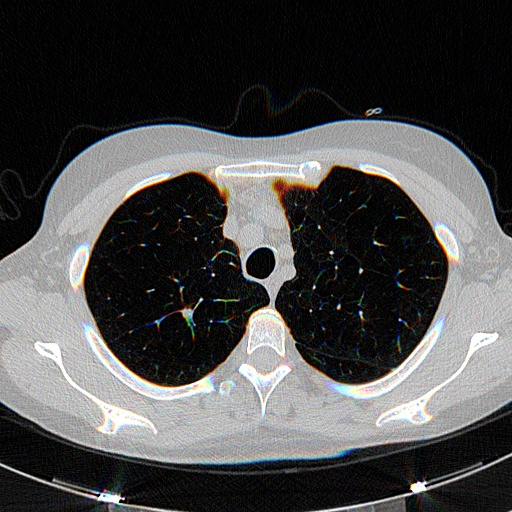
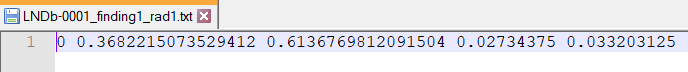

In [6]:
# Copy images and label files from my drive to the VM
!cp /mydrive/yolov4/darknet-master/data/original.zip ../darknet/data
!cp /mydrive/yolov4/darknet-master/data/pipeline1.zip ../darknet/data
!cp /mydrive/yolov4/darknet-master/data/pipeline2.zip ../darknet/data
!cp /mydrive/yolov4/darknet-master/data/pipeline3.zip ../darknet/data

In [7]:
# unzip the zip file and its contents
!unzip ../darknet/data/original.zip -d data/obj

Archive:  ../darknet/data/original.zip
  inflating: data/obj/LNDb-0001_finding1_rad1.jpg  
  inflating: data/obj/LNDb-0001_finding1_rad1.txt  
  inflating: data/obj/LNDb-0001_finding1_rad2.jpg  
  inflating: data/obj/LNDb-0001_finding1_rad2.txt  
  inflating: data/obj/LNDb-0001_finding1_rad3.jpg  
  inflating: data/obj/LNDb-0001_finding1_rad3.txt  
  inflating: data/obj/LNDb-0002_finding1_rad1.jpg  
  inflating: data/obj/LNDb-0002_finding1_rad1.txt  
  inflating: data/obj/LNDb-0002_finding1_rad2.jpg  
  inflating: data/obj/LNDb-0002_finding1_rad2.txt  
  inflating: data/obj/LNDb-0002_finding2_rad1.jpg  
  inflating: data/obj/LNDb-0002_finding2_rad1.txt  
  inflating: data/obj/LNDb-0002_finding2_rad3.jpg  
  inflating: data/obj/LNDb-0002_finding2_rad3.txt  
  inflating: data/obj/LNDb-0002_finding3_rad1.jpg  
  inflating: data/obj/LNDb-0002_finding3_rad1.txt  
  inflating: data/obj/LNDb-0002_finding3_rad3.jpg  
  inflating: data/obj/LNDb-0002_finding3_rad3.txt  
  inflating: data/obj/LND

#### 2. Configuration file

In [ ]:
# Configuration file copy to VM after it was customized in terms of classes, filters, anchors, batch size, learning rate, online data augumentation
!cp /mydrive/yolov4/backup/yolov4-custom.cfg ./cfg

#### 3. Weights

In [9]:
# Pre-trained weights
!cp /mydrive/yolov4/backup/yolov4.conv.137 ./cfg

#### 4. obj.data and obj.names

**obj.names** contain the name of each object we want to detect. In this thesis, the object is only one - nodule
**obj.data** contain the number of classes we are going to detect, path to the files indicating which image is part of the train dataset and which is part of the test dataset. Also path to obj.names and the path to the back up folder where the weights will be save during training

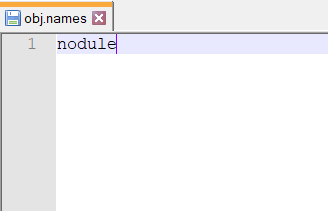
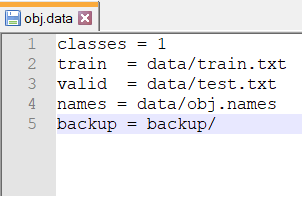

#### 5. train.txt and test.txt

path to the images which will be used for training

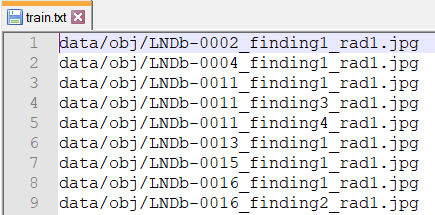

In [10]:
!cp /mydrive/yolov4/darknet-master/data/obj.names /content/darknet/data
!cp /mydrive/yolov4/darknet-master/data/obj.data  /content/darknet/data
!cp /mydrive/yolov4/darknet-master/data/train.txt  /content/darknet/data
!cp /mydrive/yolov4/darknet-master/data/test.txt  /content/darknet/data

In [ ]:
# Calculate the anchors size for the custom dataset
!./darknet detector calc_anchors data/obj.data -num_of_clusters 9 -width 512 -height 512 -show

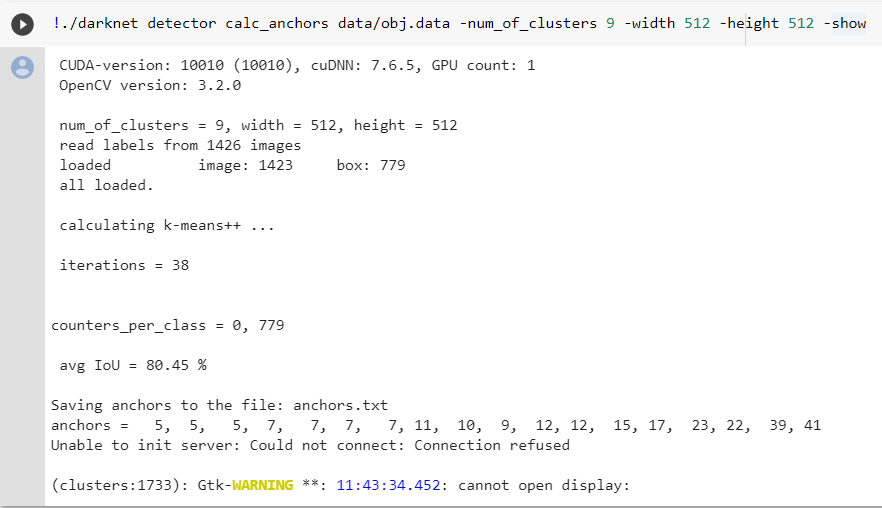

In [11]:
# Train the model
! ./darknet detector train data/obj.data cfg/yolov4-custom.cfg cfg/yolov4.conv.137 -dont_show -map 

Streaming output truncated to the last 5000 lines.
 total_bbox = 511358, rewritten_bbox = 1.219889 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000156, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.237974, iou_loss = 0.000000, total_loss = 0.237974 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.740826, GIOU: 0.740692), Class: 0.994093, Obj: 0.934017, No Obj: 0.000875, .5R: 1.000000, .75R: 0.166667, count: 6, class_loss = 0.320050, iou_loss = 1542.983643, total_loss = 1543.303711 
 total_bbox = 511364, rewritten_bbox = 1.219875 % 

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 49.14 

In [ ]:
# To generate a txt file with class probability and coordinates
!./darknet detector test data/obj.data cfg/yolov4-custom.cfg cfg/yolov4-custom_last.weights

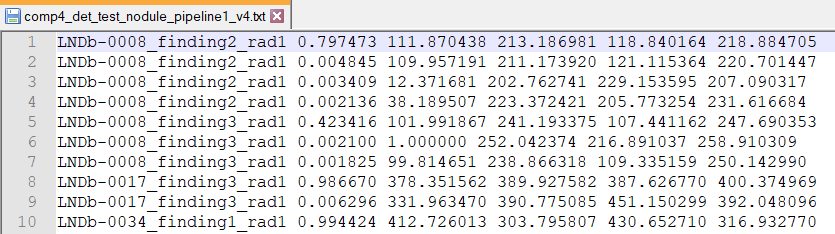

In [ ]:
# Evaluation metrics calculation
! ./darknet detector map data/obj.data cfg/yolov4-custom.cfg cfg/yolov4-custom_last.weights